In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [7]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

#### Задания

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

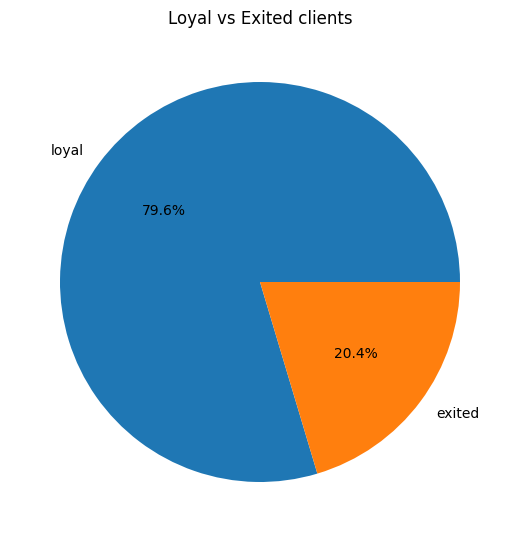

In [19]:
loyalty = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalty,
    labels=['loyal', 'exited'],
    # labels=loyalty.index,
    autopct='%.1f%%'
)
axes.set_title('Loyal vs Exited clients');

График позывает, что большинство клиентов (79.6%) банка лояльны. Данный график не показывает причин ухода 20.4% - необходим более глубокий анализ.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

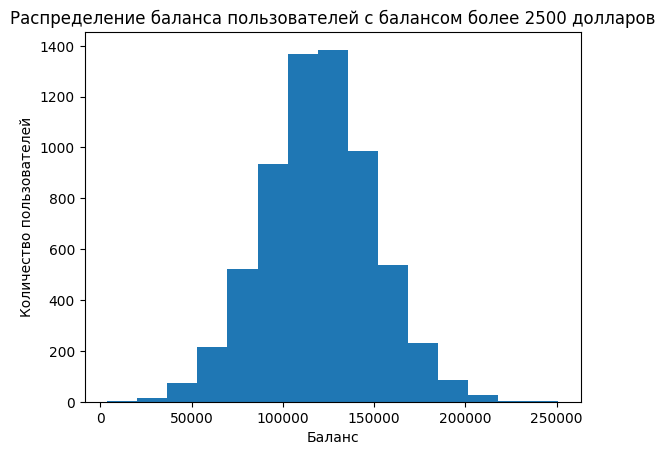

In [30]:
filtered_data = churn_data[churn_data['Balance'] > 2500]

# построение гистограммы
plt.hist(filtered_data['Balance'], bins=15)
plt.title('Распределение баланса пользователей с балансом более 2500 долларов')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.show()

Распределение баланса пользователей, у которых на счету больше 2 500 долларов, имеет практически нормальное распределение. Это означает, что большинство пользователей имеют баланс от 100 000 до 150 000

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

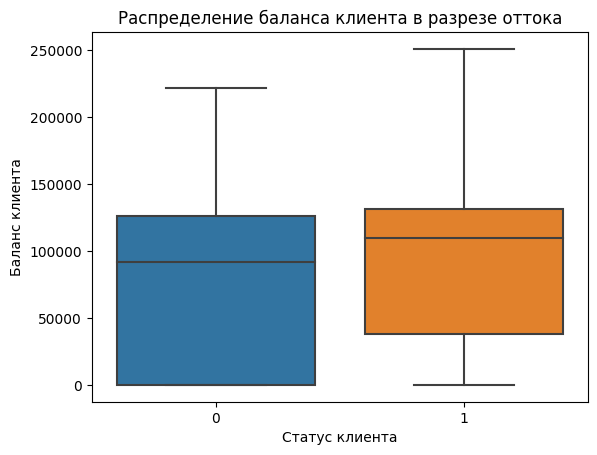

In [32]:
#  построение boxplot распределения баланса клиента в разрезе оттока
sns.boxplot(x='Exited', y='Balance', data=churn_data)
plt.title('Распределение баланса клиента в разрезе оттока')
plt.xlabel('Статус клиента')
plt.ylabel('Баланс клиента')
plt.show()


На графике видно, что медианный баланс ушедших клиентов выше, чем у лояльных. Это показывает, ушедшие клиенты могли иметь более высокий баланс на начальном этапе использования услуг банка, но по каким-то причинам перестали пользоваться его услугами и закрыли свой счет, возможно им не нравилось качество обслуживания. Нужен более глубокий анализ для подготовки качественных выводов

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

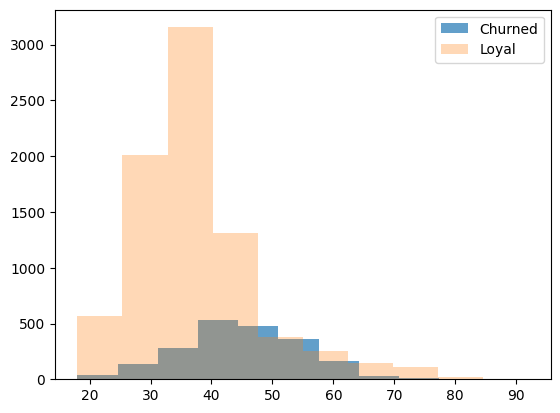

In [37]:
# Разделяем данные на две группы: ушедшие клиенты и лояльные клиенты
churned = churn_data[churn_data['Exited'] == 1]
loyal = churn_data[churn_data['Exited'] == 0]

# Строим гистограмму распределения возраста для каждой группы
plt.hist(churned['Age'], alpha=0.7, label='Churned')
plt.hist(loyal['Age'], alpha=0.3, label='Loyal')
plt.legend(loc='upper right')
plt.show()

Необходимо обратить внимание на возростную группу от 30 до 40 лет среди лояльных клиентов, также на клиентов в возрасте от 40 до 50 - это возраст клиентов, которые чаще всего уходят от банка

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

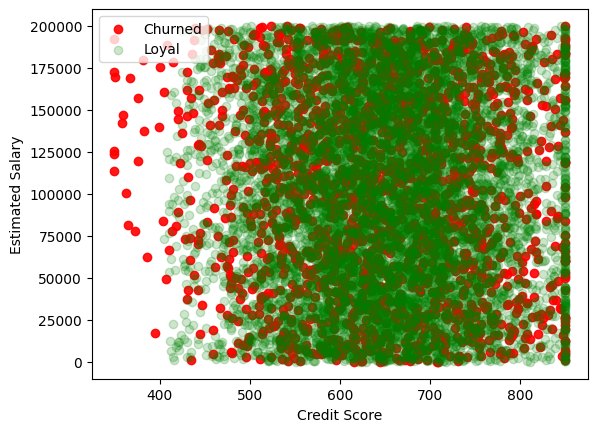

In [42]:
# Разделяем данные на две группы: ушедшие клиенты и лояльные клиенты
churned = churn_data[churn_data['Exited'] == 1]
loyal = churn_data[churn_data['Exited'] == 0]

# Строим график взаимосвязи кредитного рейтинга и предполагаемой зарплаты с расцветкой по признаку оттока клиентов
plt.scatter(churned['CreditScore'], churned['EstimatedSalary'], c='red', alpha=0.9, label='Churned')
plt.scatter(loyal['CreditScore'], loyal['EstimatedSalary'], c='green', alpha=0.2, label='Loyal')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.legend(loc='upper left')
plt.show()

На полученном графике не видно явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой клиента. Однако можно заметить, что ушедшие клиенты (красные точки) в целом имеют более низкий кредитный рейтинг по сравнению с лояльными клиентами (зеленые точки). Это может свидетельствовать о том, что клиенты с низким кредитным рейтингом склонны к уходу из банка.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

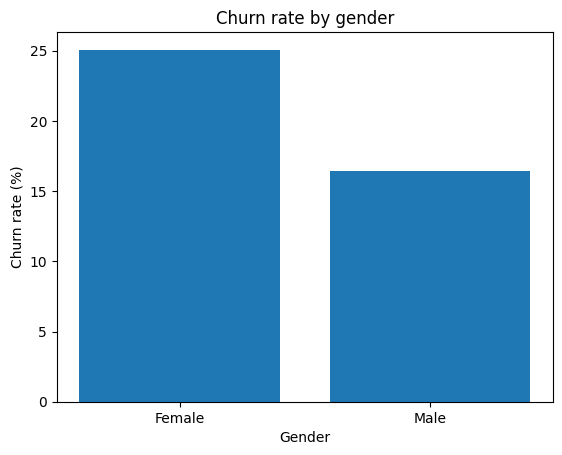

In [48]:
# Группируем данные по полу клиента и считаем процент ушедших клиентов в каждой группе
gender_churn = churn_data.groupby('Gender')['Exited'].mean() * 100

# Строим столбчатую диаграмму с процентом ушедших клиентов для каждого пола
plt.bar(gender_churn.index, gender_churn)
plt.xlabel('Gender')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by gender')
plt.show()

На полученном графике можно увидеть, что процент ушедших клиентов среди женщин выше, чем среди мужчик. Таким образом, можно сделать вывод, что мужчины остаются более лояльными клиентами банка.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

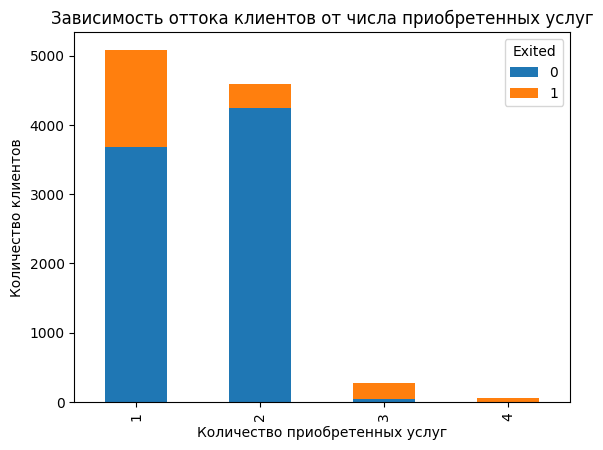

In [54]:
# группируем данные по количеству приобретенных услуг и статусу лояльности
grouped_data = churn_data.groupby(['NumOfProducts', 'Exited']).size().unstack()

# строим столбчатую диаграмму
grouped_data.plot(kind='bar', stacked=True)
plt.title('Зависимость оттока клиентов от числа приобретенных услуг')
plt.xlabel('Количество приобретенных услуг')
plt.ylabel('Количество клиентов')
plt.show()

На диаграмме можно увидеть, что большинство лояльных клиентов приобретают 1-2 услуги у банка, тогда как ушедшие клиенты чаще всего приобретали 3 или 4 услуги.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

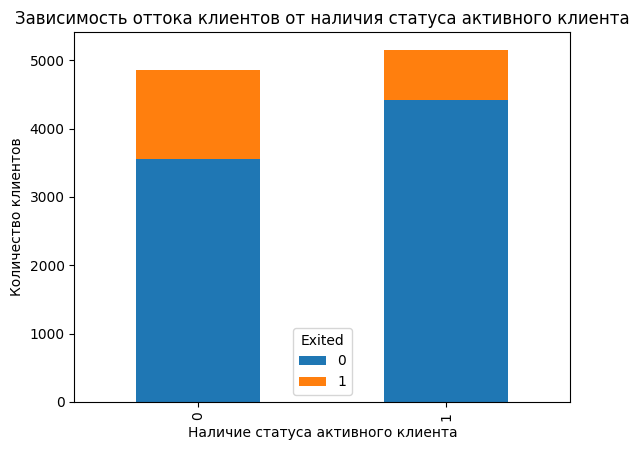

In [50]:
# группируем данные по наличию статуса активного клиента и статусу лояльности
grouped_data = churn_data.groupby(['IsActiveMember', 'Exited']).size().unstack()

# строим столбчатую диаграмму
grouped_data.plot(kind='bar', stacked=True)
plt.title('Зависимость оттока клиентов от наличия статуса активного клиента')
plt.xlabel('Наличие статуса активного клиента')
plt.ylabel('Количество клиентов')
plt.show()

На диаграмме можно увидеть, что клиенты, не имеющие статус активного клиента, чаще уходят из банка, чем те, кто имеет такой статус. Для уменьшения оттока среди неактивных клиентов, банк может предложить им бонусы или скидки на услуги при подключении к новым продуктам/

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [56]:
# удаление лишней информации
churn_data = churn_data.drop('RowNumber', axis=1)

# группировка данных по странам и подсчет доли ушедших клиентов
country_churn = churn_data.groupby('Geography')['Exited'].mean().reset_index()

# построение тепловой картограммы
fig = px.choropleth(country_churn, locations='Geography', locationmode='country names',
                    color='Exited', range_color=[0, 1], color_continuous_scale='reds',
                    title='Доля ушедших клиентов по странам')
fig.show()

Из тепловой картограммы видно, что доля ушедших клиентов больше всего в Германии, затем во Франции и в Испании. Возможно, это связано с различиями в культуре и экономической ситуации в этих странах, а также с особенностями работы банка на каждом рынке. Например, возможно, что в Германии и Франции банк предлагает менее выгодные условия для клиентов, что приводит к большему количеству уходов.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

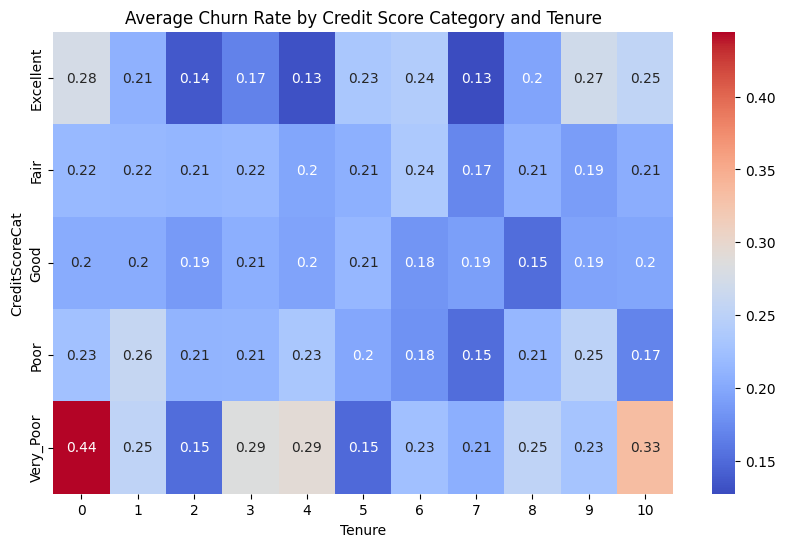

In [57]:
# функция для перевода числового признака в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# создание нового признака CreditScoreCat
churn_data["CreditScoreCat"] = churn_data["CreditScore"].apply(get_credit_score_cat)

# создание сводной таблицы
pivot_table = pd.pivot_table(churn_data, values="Exited", index="CreditScoreCat", columns="Tenure", aggfunc="mean")

# построение тепловой карты с аннотацией
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title("Average Churn Rate by Credit Score Category and Tenure")
plt.show()

In [58]:
# вывод категорий клиентов, которые уходят чаще всего
print("Categories with the highest churn rate:")
print(pivot_table.stack().sort_values(ascending=False).head(3))

Categories with the highest churn rate:
CreditScoreCat  Tenure
Very_Poor       0         0.444444
                10        0.333333
                4         0.293103
dtype: float64


Чаще всего уходят уходят клиенты которые были клиентами банка меньше года и имеют самый низкий кридитный рейтинг (Very_Poor), далее идут клиенты, которые бользуются услугами банка 10 лет и такой же кридитный рейтинг (Very_Poor)